<img src="imgs\mobiles.jpg" style="height:455px; width:85%; margin:auto; padding:10px">

<h2 style="color:#0f7300; letter-spacing:0.09em; text-align:center">Mobile price range classification</h2>
<h3 style="color:#0f7300; letter-spacing:0.19em; text-align:center">yaser Mamdouh</h3>

### Import most common libraries

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### Importing the train, test data sets

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Data overview

In [3]:
print(f"train data shape: {train_df.shape}")
print(f"test data shape: {test_df.shape}")

train data shape: (2000, 21)
test data shape: (1000, 21)


"**Null**"

In [4]:
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

"**Duplication**"

In [5]:
train_df.duplicated().sum()

0

"**More Info**"

In [75]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**_Outliers_**

In [7]:
# Calculate the Z-score for each numerical feature
z_scores = np.abs((train_df - train_df.mean()) / train_df.std())

# Set the threshold for identifying outliers
threshold = 3

# Create a boolean mask for non-outliers
mask = (z_scores < threshold).all(axis=1)

# Apply the mask to get the DataFrame without outliers
train_df = train_df[mask]

# Identify the outliers
outliers = train_df[~mask]

print("Outliers:")
outliers

#print("DataFrame without outliers:")


Outliers:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [8]:
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [84]:
train_df['battery_power'].min()

501

In [85]:
train_df['battery_power'].max()

1998

In [86]:
train_df['four_g'].value_counts()

four_g
1    1035
0     953
Name: count, dtype: int64

In [88]:
train_df['mobile_wt'].min()

80

In [89]:
train_df['mobile_wt'].max()

200

In [91]:
train_df['n_cores'].value_counts().sort_index()

n_cores
1    241
2    245
3    244
4    271
5    244
6    230
7    257
8    256
Name: count, dtype: int64

In [95]:
train_df['px_height'].min()

0

In [93]:
train_df['px_height'].max()

1960

In [96]:
train_df['px_width'].min()

500

In [97]:
train_df['px_width'].max()

1998

In [98]:
train_df['ram'].min()

256

In [99]:
train_df['ram'].max()

3998

In [101]:
train_df['touch_screen'].value_counts()

touch_screen
1    999
0    989
Name: count, dtype: int64

In [103]:
train_df['price_range'].value_counts().sort_index()

price_range
0    496
1    497
2    497
3    498
Name: count, dtype: int64

### Features ➕ Target 🎯

In [9]:
Y = train_df.price_range
X = train_df.drop('price_range', axis=1)

### EDA: Exploratory Data Analysis

- #### feature-feature correlation

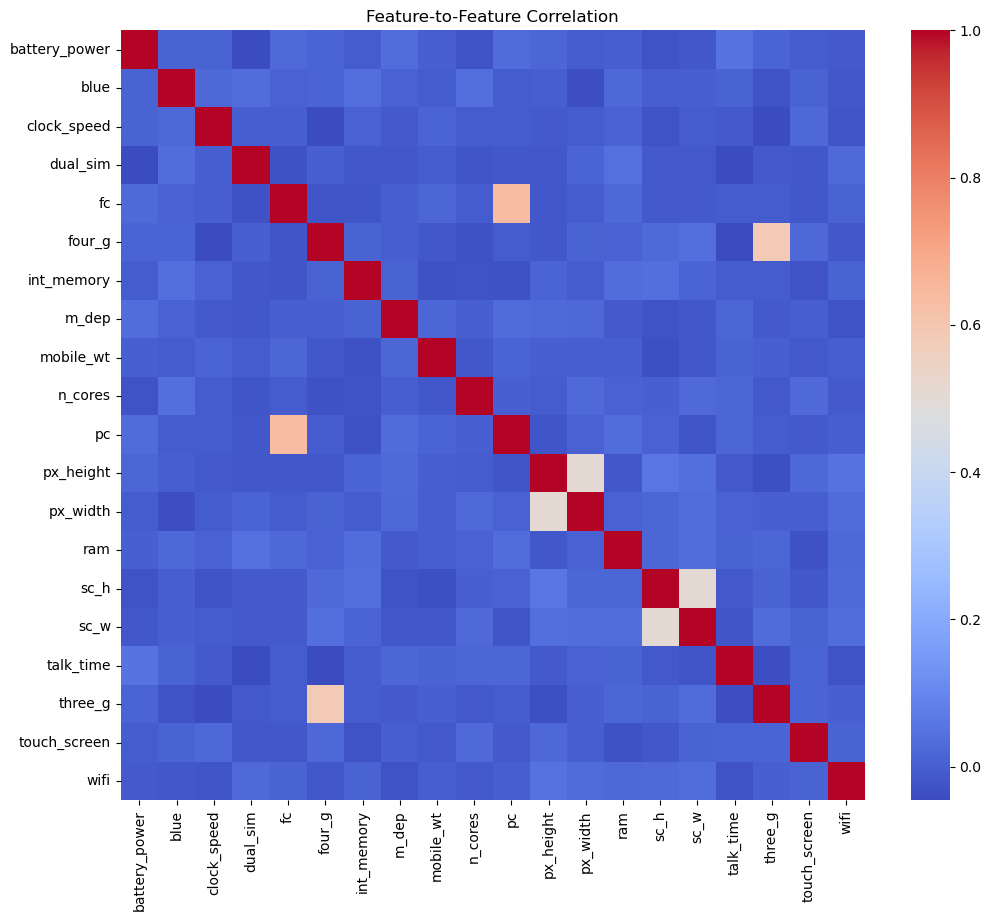

In [10]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature-to-Feature Correlation')
plt.savefig("imgs\Feature-to-Feature Correlation.png")
plt.show()

"**KDE plot**"

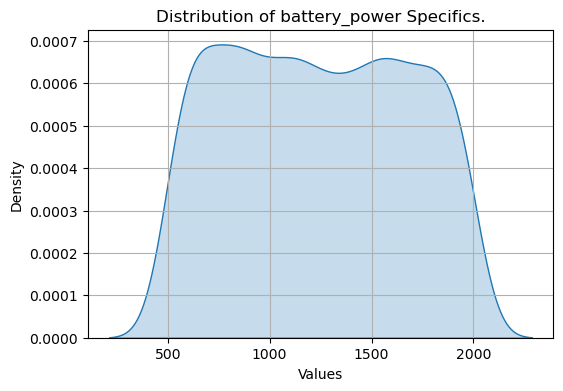

In [11]:
plt.figure(figsize=(6,4))

sns.kdeplot(data=X['battery_power'], fill=True, legend=True)
plt.title("Distribution of battery_power Specifics.")
plt.xlabel(f"Values")
plt.ylabel("Density")
plt.grid(True)
plt.savefig("imgs\Distribution of battery_power.png")
plt.show()

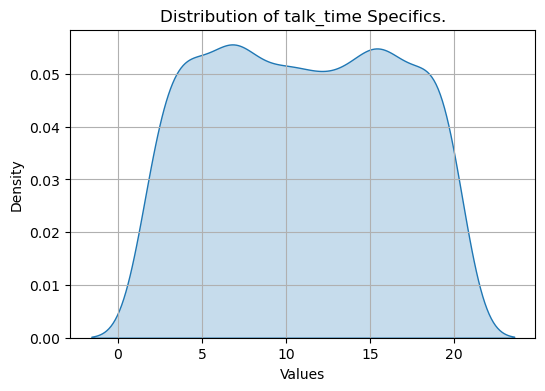

In [12]:
plt.figure(figsize=(6,4))

sns.kdeplot(data=X['talk_time'], fill=True, legend=True)
plt.title("Distribution of talk_time Specifics.")
plt.xlabel(f"Values")
plt.ylabel("Density")
plt.grid(True)
plt.savefig("imgs\Distribution of talk_time.png")
plt.show()

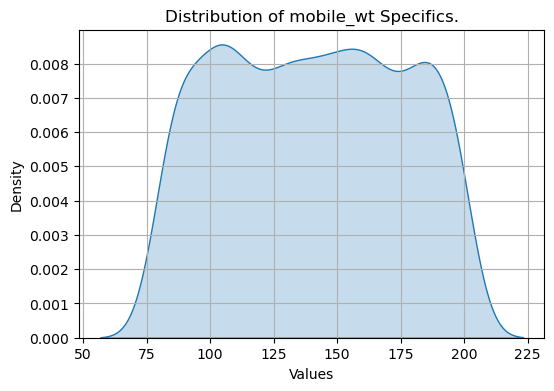

In [13]:
plt.figure(figsize=(6,4))

sns.kdeplot(data=X['mobile_wt'], fill=True, legend=True)
plt.title("Distribution of mobile_wt Specifics.")
plt.xlabel(f"Values")
plt.ylabel("Density")
plt.grid(True)
plt.savefig("imgs\Distribution of mobile_wt.png")
plt.show()

"**Box plot**"

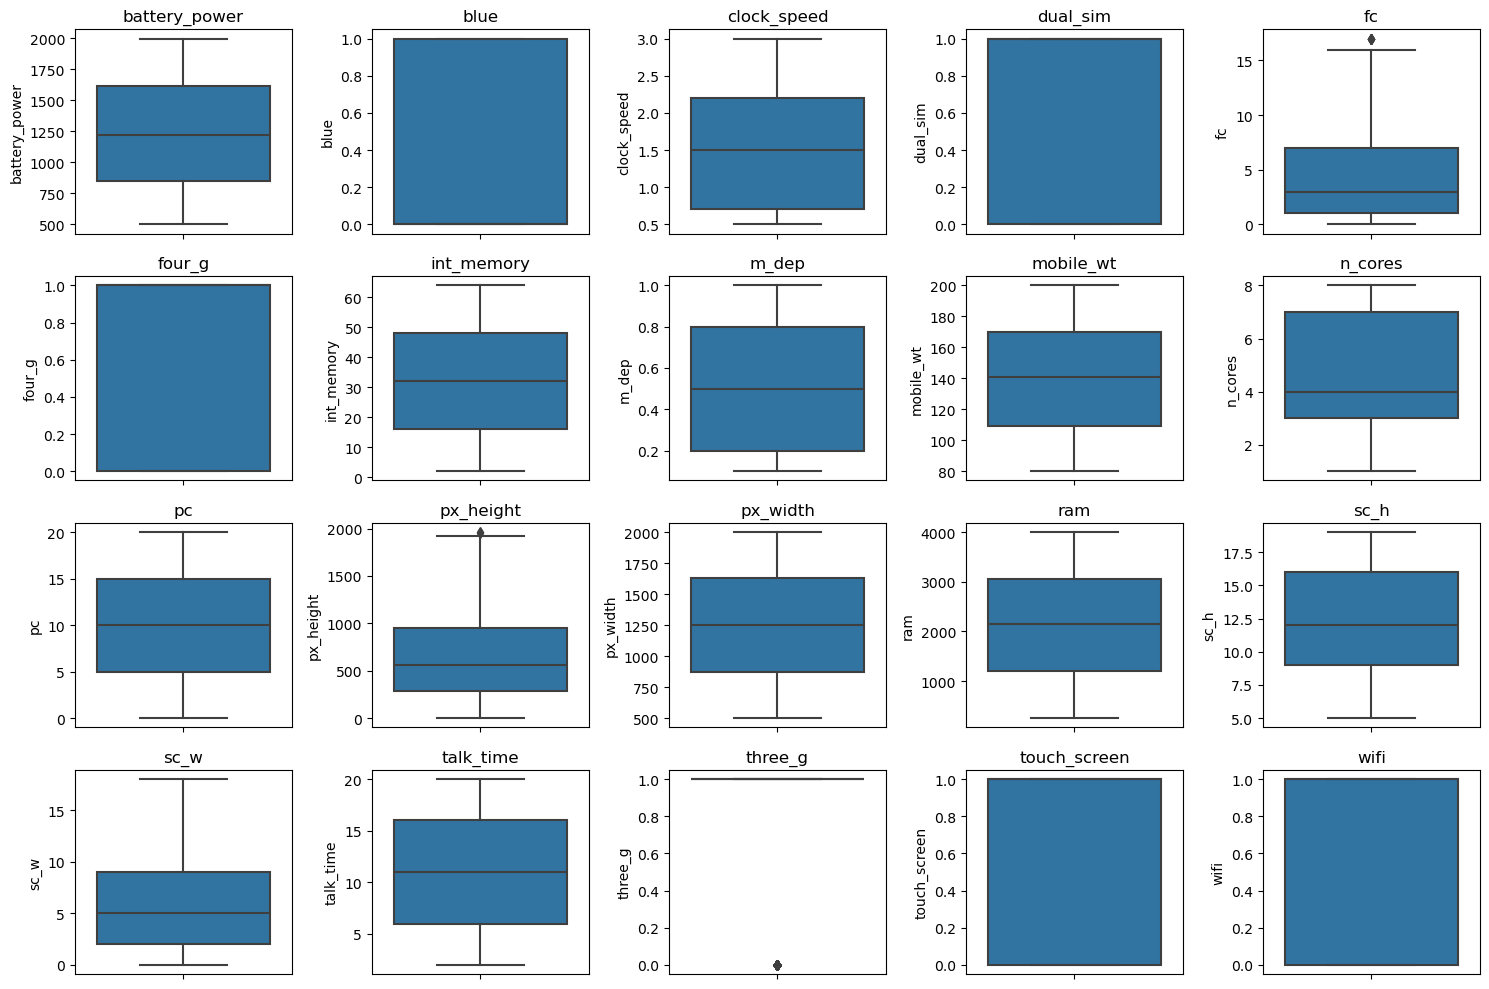

In [14]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=X[column])
    plt.title(column)

plt.tight_layout()
plt.show()

"**Bar plot**"

"**Heatmap**"

"**Histogram**"

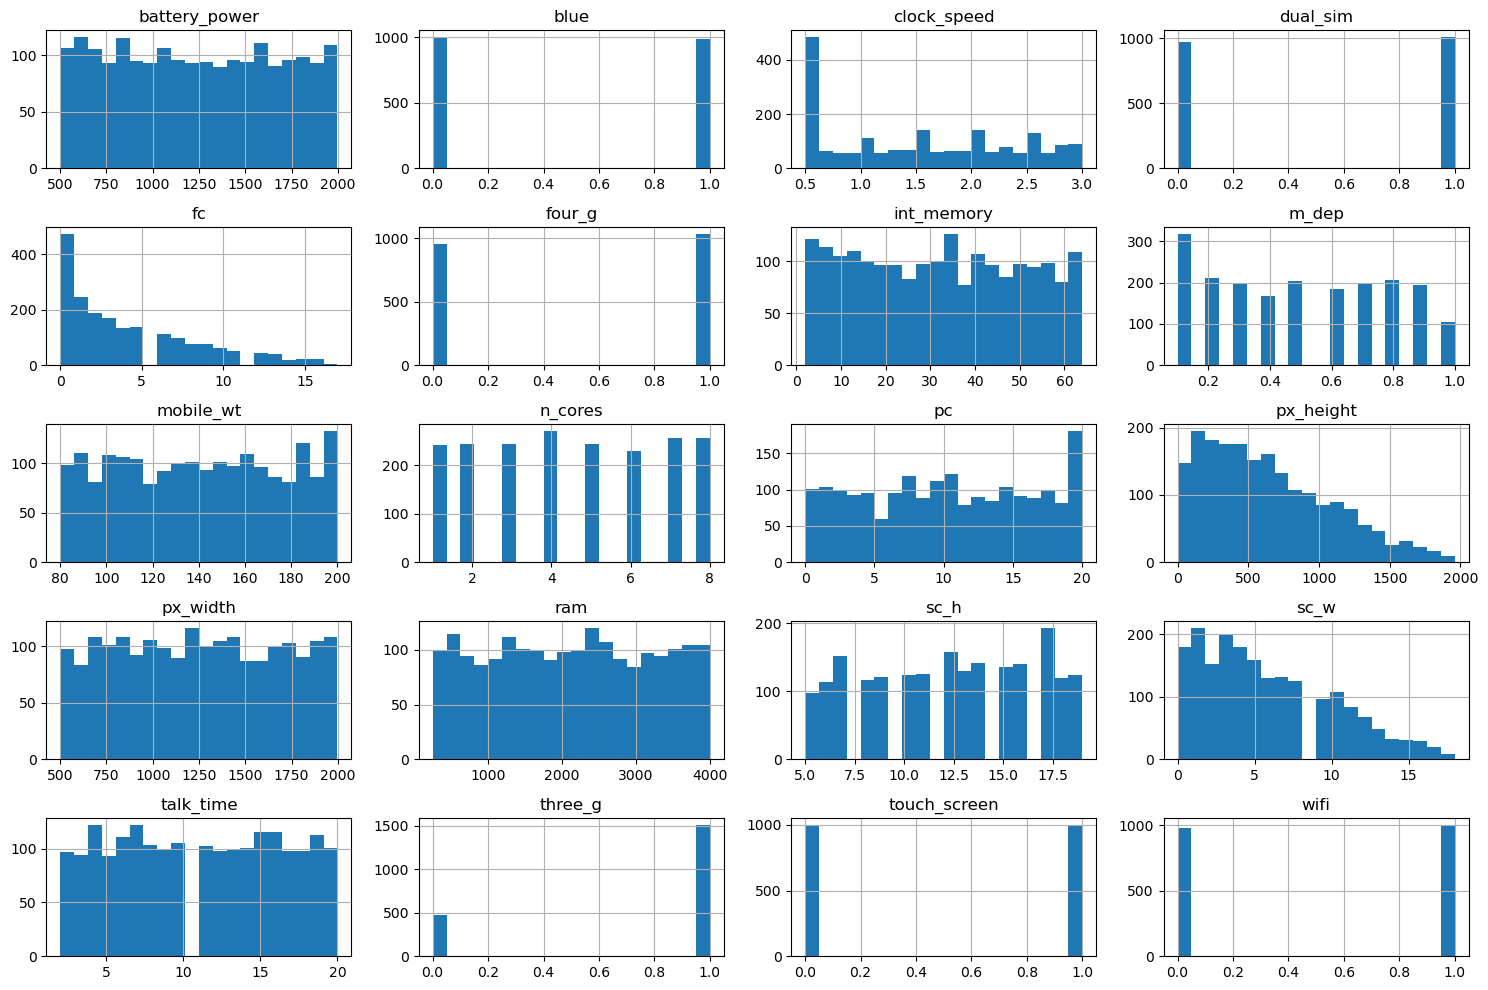

In [15]:
X.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

joblib.dump(scaler , "files\scaler.pkl") # sace the scaler

scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

mob_data = pd.concat([scaled_df, Y.reset_index(drop=True)], axis=1)

In [17]:
mob_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.900327,-0.990986,0.830104,-1.018276,-0.764723,-1.042134,-1.384328,0.339804,1.353256,-1.102534,...,-1.408890,-1.147132,0.389750,-0.784980,0.281717,1.463059,-1.782266,-1.005043,0.989990,1
1,-0.492942,1.009096,-1.251685,0.982052,-1.001747,0.959569,1.153797,0.686586,-0.117658,-0.665739,...,0.589531,1.704865,0.465402,1.113199,-0.635651,-0.735539,0.561084,0.994982,-1.010111,2
2,-1.535301,1.009096,-1.251685,0.982052,-0.527699,0.959569,0.491677,1.380149,0.136923,0.207851,...,1.397932,1.075203,0.439570,-0.310435,-0.864993,-0.369106,0.561084,0.994982,-1.010111,2
3,-1.416954,1.009096,1.197478,-1.018276,-1.001747,-1.042134,-1.218798,1.033367,-0.259092,0.644646,...,1.291801,1.237249,0.592719,0.875926,0.511059,-0.002673,0.561084,-1.005043,-1.010111,2
4,1.327771,1.009096,-0.394478,-1.018276,2.079560,0.959569,0.657207,0.339804,0.023776,-1.102534,...,1.273736,-0.091523,-0.660149,-1.022252,-0.864993,0.730193,0.561084,0.994982,-1.010111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,-1.009570,1.009096,-1.251685,0.982052,-1.001747,0.959569,-1.660212,1.033367,-0.966262,0.644646,...,1.305349,1.478002,-1.345628,0.164109,-0.406309,1.463059,0.561084,0.994982,-1.010111,0
1984,1.655499,1.009096,1.319937,0.982052,-1.001747,-1.042134,0.381324,-1.047322,1.324969,-0.228944,...,0.612112,1.651621,-0.087225,-0.310435,0.969743,0.913410,0.561084,0.994982,0.989990,2
1985,1.532601,-0.990986,-0.761853,0.982052,-0.764723,0.959569,0.215794,0.686586,-0.909688,1.518236,...,0.505981,0.880749,0.858422,-0.784980,-1.094335,-1.101972,0.561084,0.994982,-1.010111,3
1986,0.624520,-0.990986,-0.761853,-1.018276,-0.053652,0.959569,0.767560,-1.394104,0.136923,0.207851,...,-0.695330,-1.346216,-1.160189,1.350471,0.969743,1.463059,0.561084,0.994982,0.989990,0


In [18]:
mob_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

"**Splitting features**"

In [19]:
# Split into features (X) and target (y)
y_train = mob_data.price_range
x_train = mob_data.drop('price_range', axis=1)

In [20]:
print(x_train.shape)

(1988, 20)


In [21]:
x_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [22]:
print(test_df.shape)

(1000, 21)


In [23]:
test_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [24]:
# Check for extra columns in test_df not present in train_df
extra_columns_in_test = set(test_df.columns) - set(x_train.columns)
print("Extra columns in test:", extra_columns_in_test)

# Remove extra columns from test_df if necessary
if extra_columns_in_test:
    test_df = test_df.drop(columns=extra_columns_in_test)


Extra columns in test: {'id'}


In [25]:
test_df.columns
test_df.shape

(1000, 20)

### Load the scaler for test data transformation

In [26]:
scaler = joblib.load("files\scaler.pkl")

# Transform test data using the loaded scaler
x_test = scaler.transform(test_df)
x_test = pd.DataFrame(x_test, columns=test_df.columns)
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.442873,1.009096,0.340271,0.982052,2.316584,-1.042134,-1.494682,-1.394104,1.494690,-0.665739,1.017856,-0.943721,0.371464,1.244985,-0.073163,0.281717,-1.651621,-1.782266,0.994982,-1.010111
1,-0.902603,1.009096,-1.251685,0.982052,-0.053652,0.959569,1.595210,1.033367,1.438116,0.207851,0.354957,0.230492,-0.913323,1.631547,-1.496797,-1.323677,-0.735539,0.561084,-1.005043,-1.010111
2,1.295908,1.009096,1.564853,-1.018276,-0.764723,-1.042134,-0.280796,1.380149,1.296682,-0.665739,-0.970839,1.413738,0.264977,0.248595,1.113199,0.969743,-0.185889,-1.782266,0.994982,0.989990
3,0.701901,-0.990986,-1.251685,0.982052,3.264678,0.959569,-0.391149,-0.006977,-1.249130,1.518236,1.680754,-0.787912,1.158541,1.629702,-0.547708,-1.323677,-0.735539,0.561084,0.994982,-1.010111
4,0.447001,-0.990986,-0.149562,-1.018276,1.605513,0.959569,0.933090,-0.006977,-0.909688,0.644646,1.349305,0.237267,-1.022125,-0.326174,0.638654,0.511059,-0.735539,0.561084,-1.005043,0.989990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.052388,1.009096,0.462729,-1.018276,-1.001747,0.959569,1.208973,-0.006977,0.844093,1.081441,1.183580,0.000166,-0.783687,-0.005115,0.401382,0.511059,0.730193,0.561084,0.994982,-1.010111
996,-1.430610,-0.990986,0.340271,0.982052,-1.001747,-1.042134,-1.053269,1.380149,1.296682,-0.228944,-1.302288,1.147282,0.880749,-0.178561,-1.022252,-1.094335,1.463059,-1.782266,0.994982,0.989990
997,-0.119696,-0.990986,-0.149562,-1.018276,-0.764723,0.959569,-1.329152,-0.006977,-1.701718,-1.539329,0.354957,-0.376937,-0.987401,-0.833594,-1.734069,-1.323677,0.546977,0.561084,-1.005043,-1.010111
998,0.672314,1.009096,-1.251685,0.982052,-1.001747,-1.042134,0.988267,-0.353759,0.872380,-1.102534,0.354957,-1.368245,-0.971197,0.352847,0.638654,1.199084,-0.918755,-1.782266,0.994982,-1.010111


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier


### Define baseline models

In [28]:
def get_based_models():
    based_models = []
    
    based_models.append(('LR_L2', LogisticRegression(penalty='l2')))
    
    based_models.append(('LDA', LinearDiscriminantAnalysis()))
    
    based_models.append(('KNN_5', KNeighborsClassifier(n_neighbors=5)))
    based_models.append(('KNN_7', KNeighborsClassifier(n_neighbors=7)))
    based_models.append(('KNN_9', KNeighborsClassifier(n_neighbors=9)))
    based_models.append(('KNN_11', KNeighborsClassifier(n_neighbors=11)))
    
    based_models.append(('CART', DecisionTreeClassifier()))
    
    based_models.append(('NB', GaussianNB()))
    
    based_models.append(('SVM_Linear', SVC(kernel='linear', gamma='auto', probability=True)))
    based_models.append(('SVM_RBF', SVC(kernel='rbf', gamma='auto', probability=True)))
    based_models.append(('SVM_Sigmoid', SVC(kernel='sigmoid', gamma='auto', probability=True)))
    based_models.append(('SVM_Poly', SVC(kernel='poly', gamma='auto', probability=True)))
    
    based_models.append(('AdaBoost', AdaBoostClassifier()))
    
    based_models.append(('GradientBoosting', GradientBoostingClassifier(n_estimators=100, max_features='sqrt')))
    
    based_models.append(('RF_Entropy_100', RandomForestClassifier(criterion='entropy', n_estimators=100)))
    based_models.append(('RF_Entropy_500', RandomForestClassifier(criterion='entropy', n_estimators=500)))

    based_models.append(('RF_Gini_100', RandomForestClassifier(criterion='gini', n_estimators=100)))
    based_models.append(('RF_Gini_500', RandomForestClassifier(criterion='gini', n_estimators=500)))

    based_models.append(('ExtraTrees_100', ExtraTreesClassifier(n_estimators=100)))
    based_models.append(('ExtraTrees_500', ExtraTreesClassifier(n_estimators=500)))
    based_models.append(('ExtraTrees_1000', ExtraTreesClassifier(n_estimators=1000)))

    based_models.append(('MLP', MLPClassifier()))
    
    based_models.append(('SGD', SGDClassifier(max_iter=1000, tol=1e-4)))

    
    return based_models

### 10-Fold Cross Validation

In [29]:
# Define the models
models = get_based_models()

# Evaluate each model using cross-validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean Accuracy: {np.mean(cv_results):.4f} (Std Dev: {np.std(cv_results):.4f})')


LR_L2: Mean Accuracy: 0.9628 (Std Dev: 0.0096)
LDA: Mean Accuracy: 0.9442 (Std Dev: 0.0099)
KNN_5: Mean Accuracy: 0.5050 (Std Dev: 0.0280)
KNN_7: Mean Accuracy: 0.5181 (Std Dev: 0.0377)
KNN_9: Mean Accuracy: 0.5382 (Std Dev: 0.0340)
KNN_11: Mean Accuracy: 0.5523 (Std Dev: 0.0316)
CART: Mean Accuracy: 0.8254 (Std Dev: 0.0210)
NB: Mean Accuracy: 0.8063 (Std Dev: 0.0180)
SVM_Linear: Mean Accuracy: 0.9588 (Std Dev: 0.0121)
SVM_RBF: Mean Accuracy: 0.8767 (Std Dev: 0.0181)
SVM_Sigmoid: Mean Accuracy: 0.9266 (Std Dev: 0.0141)
SVM_Poly: Mean Accuracy: 0.7862 (Std Dev: 0.0232)
AdaBoost: Mean Accuracy: 0.6851 (Std Dev: 0.0621)
GradientBoosting: Mean Accuracy: 0.8672 (Std Dev: 0.0080)
RF_Entropy_100: Mean Accuracy: 0.8848 (Std Dev: 0.0192)
RF_Entropy_500: Mean Accuracy: 0.8913 (Std Dev: 0.0165)
RF_Gini_100: Mean Accuracy: 0.8828 (Std Dev: 0.0101)
RF_Gini_500: Mean Accuracy: 0.8853 (Std Dev: 0.0121)
ExtraTrees_100: Mean Accuracy: 0.8587 (Std Dev: 0.0245)
ExtraTrees_500: Mean Accuracy: 0.8858 (Std 

### High performance models
> - LR_L2: Mean Accuracy: 0.9628 (Std Dev: 0.0096)
> - 
LDA: Mean Accuracy: 0.9442 (Std Dev: 0.0099
> - SVM_Linear: Mean Accuracy: 0.9588 (Std Dev: 0.0121)
> - 
SVM_RBF: Mean Accuracy: 0.8767 (Std Dev: 0.0181
> - 
SVM_Sigmoid: Mean Accuracy: 0.9266 (Std Dev: 0.014
> - RF_Entropy_100: Mean Accuracy: 0.8848 (Std Dev: 0.0120)
> - MLP: Mean Accuracy: 0.9230 (Std Dev: 0.0168)1))

#### "define cross validation strategy"

In [30]:
kfold = KFold(n_splits=8, random_state=42, shuffle=True)

### 1. Logistic Regression

In [31]:
cl1 = LogisticRegression()

# evaluate the model using cross validation
crossvalid_results = cross_val_score(cl1, x_train, y_train, cv=kfold, scoring='accuracy')
# output the mean accuracy and std deviation
print(f"Logistic Regression => Mean Accuracy: {np.mean(crossvalid_results):.4f}, Mean Std Deviation: {np.std(crossvalid_results):.4f}")


# Perform cross-validation and get cross-validation predictions
crossval_preds = cross_val_predict(cl1, x_train, y_train, cv=kfold)

# Calculate cross-validation metrics
crossval_accuracy = accuracy_score(y_train, crossval_preds)
crossval_recall = recall_score(y_train, crossval_preds, average='macro')
crossval_precision = precision_score(y_train, crossval_preds, average='macro')
crossval_f1 = f1_score(y_train, crossval_preds, average='macro')

print("Cross-Validation Performance:")
print(f"Accuracy: {crossval_accuracy:.2f}")
print(f"Recall: {crossval_recall:.2f}")
print(f"Precision: {crossval_precision:.2f}")
print(f"F1-score: {crossval_f1:.2f}")


cl1.fit(x_train, y_train)
y_train_pred = cl1.predict(x_train)
y_test_pred = cl1.predict(x_test)

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}%")
print(f"Recall: {recall_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"Precision: {precision_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"F1-score: {f1_score(y_train, y_train_pred, average='macro'):.2f}%")

Logistic Regression => Mean Accuracy: 0.9628, Mean Std Deviation: 0.0154
Cross-Validation Performance:
Accuracy: 0.96
Recall: 0.96
Precision: 0.96
F1-score: 0.96
Training Set Performance:
Accuracy: 0.98%
Recall: 0.98%
Precision: 0.98%
F1-score: 0.98%


### 2. Linear Discriminant Analysis

In [33]:
cl2 = LinearDiscriminantAnalysis()

# evaluate the model using cross validation
cv_results = cross_val_score(cl2, x_train, y_train, cv=kfold, scoring='accuracy')
# Output the mean accuracy and standard deviation
print(f"Linear Discriminant Analysis => Mean Accuracy: {np.mean(cv_results):.4f}, Std Dev: {np.std(cv_results):.4f}")

# Perform cross-validation and get cross-validation predictions
crossval_preds = cross_val_predict(cl2, x_train, y_train, cv=kfold)

# Calculate cross-validation metrics
crossval_accuracy = accuracy_score(y_train, crossval_preds)
crossval_recall = recall_score(y_train, crossval_preds, average='macro')
crossval_precision = precision_score(y_train, crossval_preds, average='macro')
crossval_f1 = f1_score(y_train, crossval_preds, average='macro')

print("Cross-Validation Performance:")
print(f"Accuracy: {crossval_accuracy:.2f}")
print(f"Recall: {crossval_recall:.2f}")
print(f"Precision: {crossval_precision:.2f}")
print(f"F1-score: {crossval_f1:.2f}")

# fit the model
cl2.fit(x_train, y_train)
y_train_pred = cl2.predict(x_train)
#2.predict(x_test)

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}%")
print(f"Recall: {recall_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"Precision: {precision_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"F1-score: {f1_score(y_train, y_train_pred, average='macro'):.2f}%")

Linear Discriminant Analysis => Mean Accuracy: 0.9452, Std Dev: 0.0085
Cross-Validation Performance:
Accuracy: 0.95
Recall: 0.95
Precision: 0.95
F1-score: 0.95
Training Set Performance:
Accuracy: 0.95%
Recall: 0.95%
Precision: 0.95%
F1-score: 0.95%


### 3. Support Vector Classifier (Linear)

In [34]:
cl3 = SVC()
c_valid_results = cross_val_score(cl3, x_train, y_train, cv=kfold, scoring='accuracy')

# Output the mean accuracy and standard deviation
print(f"SVC (linear) => Mean Accuracy: {np.mean(c_valid_results):.4f}, Std Dev: {np.std(c_valid_results):.4f}")

# Perform cross-validation and get cross-validation predictions
crossval_preds = cross_val_predict(cl3, x_train, y_train, cv=kfold)

# Calculate cross-validation metrics
crossval_accuracy = accuracy_score(y_train, crossval_preds)
crossval_recall = recall_score(y_train, crossval_preds, average='macro')
crossval_precision = precision_score(y_train, crossval_preds, average='macro')
crossval_f1 = f1_score(y_train, crossval_preds, average='macro')

print("Cross-Validation Performance:")
print(f"Accuracy: {crossval_accuracy:.2f}")
print(f"Recall: {crossval_recall:.2f}")
print(f"Precision: {crossval_precision:.2f}")
print(f"F1-score: {crossval_f1:.2f}")


cl3.fit(x_train, y_train)
y_train_pred = cl3.predict(x_train)
y_test_pred = cl3.predict(x_test)

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}%")
print(f"Recall: {recall_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"Precision: {precision_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"F1-score: {f1_score(y_train, y_train_pred, average='macro'):.2f}%")

SVC (linear) => Mean Accuracy: 0.8753, Std Dev: 0.0227
Cross-Validation Performance:
Accuracy: 0.88
Recall: 0.88
Precision: 0.88
F1-score: 0.88
Training Set Performance:
Accuracy: 0.98%
Recall: 0.98%
Precision: 0.98%
F1-score: 0.98%


### 4. Multi-Layer Perceptron

In [35]:
cl4 = MLPClassifier()
# cross validations
c_valid_results = cross_val_score(cl4, x_train, y_train, cv=kfold, scoring='accuracy')

# Output the mean accuracy and standard deviation
print(f"MLP classifier => Mean Accuracy: {np.mean(c_valid_results):.4f}, Std Dev: {np.std(c_valid_results):.4f}")

# Perform cross-validation and get cross-validation predictions
crossval_preds = cross_val_predict(cl4, x_train, y_train, cv=kfold)

# Calculate cross-validation metrics
crossval_accuracy = accuracy_score(y_train, crossval_preds)
crossval_recall = recall_score(y_train, crossval_preds, average='macro')
crossval_precision = precision_score(y_train, crossval_preds, average='macro')
crossval_f1 = f1_score(y_train, crossval_preds, average='macro')

print("Cross-Validation Performance:")
print(f"Accuracy: {crossval_accuracy:.2f}")
print(f"Recall: {crossval_recall:.2f}")
print(f"Precision: {crossval_precision:.2f}")
print(f"F1-score: {crossval_f1:.2f}")


cl4.fit(x_train, y_train)
y_train_pred = cl4.predict(x_train)
y_test_pred = cl4.predict(x_test)

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}%")
print(f"Recall: {recall_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"Precision: {precision_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"F1-score: {f1_score(y_train, y_train_pred, average='macro'):.2f}%")

MLP classifier => Mean Accuracy: 0.9230, Std Dev: 0.0145
Cross-Validation Performance:
Accuracy: 0.93
Recall: 0.93
Precision: 0.93
F1-score: 0.93
Training Set Performance:
Accuracy: 1.00%
Recall: 1.00%
Precision: 1.00%
F1-score: 1.00%


***

### Saving the best performing model (LDA)

In [36]:
#joblib.dump(cl2, "files\mobile-price-classifier_LDA_model.pkl")

***

***

### Feature selection

### - Univariate feature selection

In [37]:
from sklearn.feature_selection import chi2, SelectKBest

In [38]:
# Chi square has a restrict that all features must: "not contain any negative values"
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
x_train_scaled = minmax_scaler.fit_transform(x_train)

In [39]:
feature_select = SelectKBest(chi2, k=8)
feature_select.fit(x_train_scaled, y_train)

# Get the scores and feature names
scores = feature_select.scores_
features = x_train.columns  # Assuming x_train is a DataFrame

# Get the indices of the selected features
selected_feature_indices = feature_select.get_support(indices=True)

# Select feature names using the indices
selected_feature_names = features[selected_feature_indices]

print("Scores of all features:\n", scores)
print("*"*80)
print("best selected feature:", selected_feature_names)

Scores of all features:
 [ 15.87834017   0.57743783   0.41771431   0.65237237   0.71970309
   1.7164213    1.43512954   0.98704611   1.78468479   1.5940223
   0.52946738   8.94545083  11.05344098 280.45321724   1.19938754
   0.92183969   0.78601541   0.33323259   1.87196096   0.42739113]
********************************************************************************
best selected feature: Index(['battery_power', 'four_g', 'mobile_wt', 'n_cores', 'px_height',
       'px_width', 'ram', 'touch_screen'],
      dtype='object')


## Selected features and new training

In [53]:
y_train = train_df.price_range
x_train = train_df[['battery_power', 'four_g', 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'touch_screen']]

x_test = test_df[['battery_power', 'four_g', 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'touch_screen']]

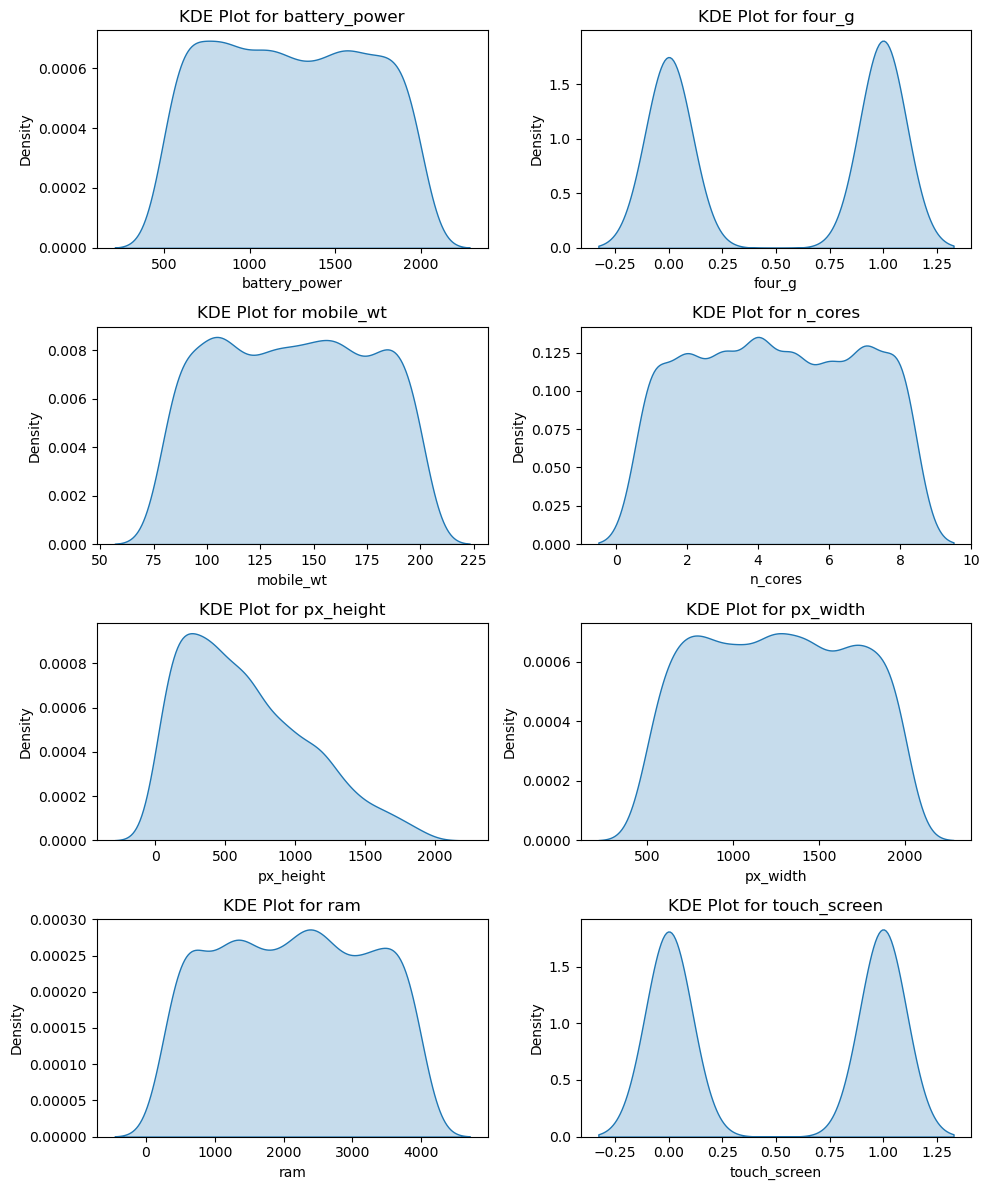

In [69]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.flatten()

# Loop through each feature and plot KDE
for i, feature in enumerate(x_train.columns):
    sns.kdeplot(data=x_train[feature], ax=axes[i], shade=True)
    axes[i].set_title(f'KDE Plot for {feature}', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


### Scaling the new selected features

In [76]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
# saving the scaler
joblib.dump(scaler, "files\\new_scaler.pkl")
x_train_df.head()

,battery_power,four_g,mobile_wt,n_cores,px_height,px_width,ram,touch_screen
0,-0.900327,-1.042134,1.353256,-1.102534,-1.408890,-1.147132,0.389750,-1.005043
1,-0.492942,0.959569,-0.117658,-0.665739,0.589531,1.704865,0.465402,0.994982
2,-1.535301,0.959569,0.136923,0.207851,1.397932,1.075203,0.439570,0.994982
3,-1.416954,-1.042134,-0.259092,0.644646,1.291801,1.237249,0.592719,-1.005043
4,1.327771,0.959569,0.023776,-1.102534,1.273736,-0.091523,-0.660149,0.994982


In [77]:
saved_scaler = joblib.load("files\\new_scaler.pkl")
x_test_scaled = saved_scaler.transform(x_test)
x_test_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_df.head()

,battery_power,four_g,mobile_wt,n_cores,px_height,px_width,ram,touch_screen
0,-0.442873,-1.042134,1.494690,-0.665739,-0.943721,0.371464,1.244985,0.994982
1,-0.902603,0.959569,1.438116,0.207851,0.230492,-0.913323,1.631547,-1.005043
2,1.295908,-1.042134,1.296682,-0.665739,1.413738,0.264977,0.248595,0.994982
3,0.701901,0.959569,-1.249130,1.518236,-0.787912,1.158541,1.629702,0.994982
4,0.447001,0.959569,-0.909688,0.644646,0.237267,-1.022125,-0.326174,-1.005043


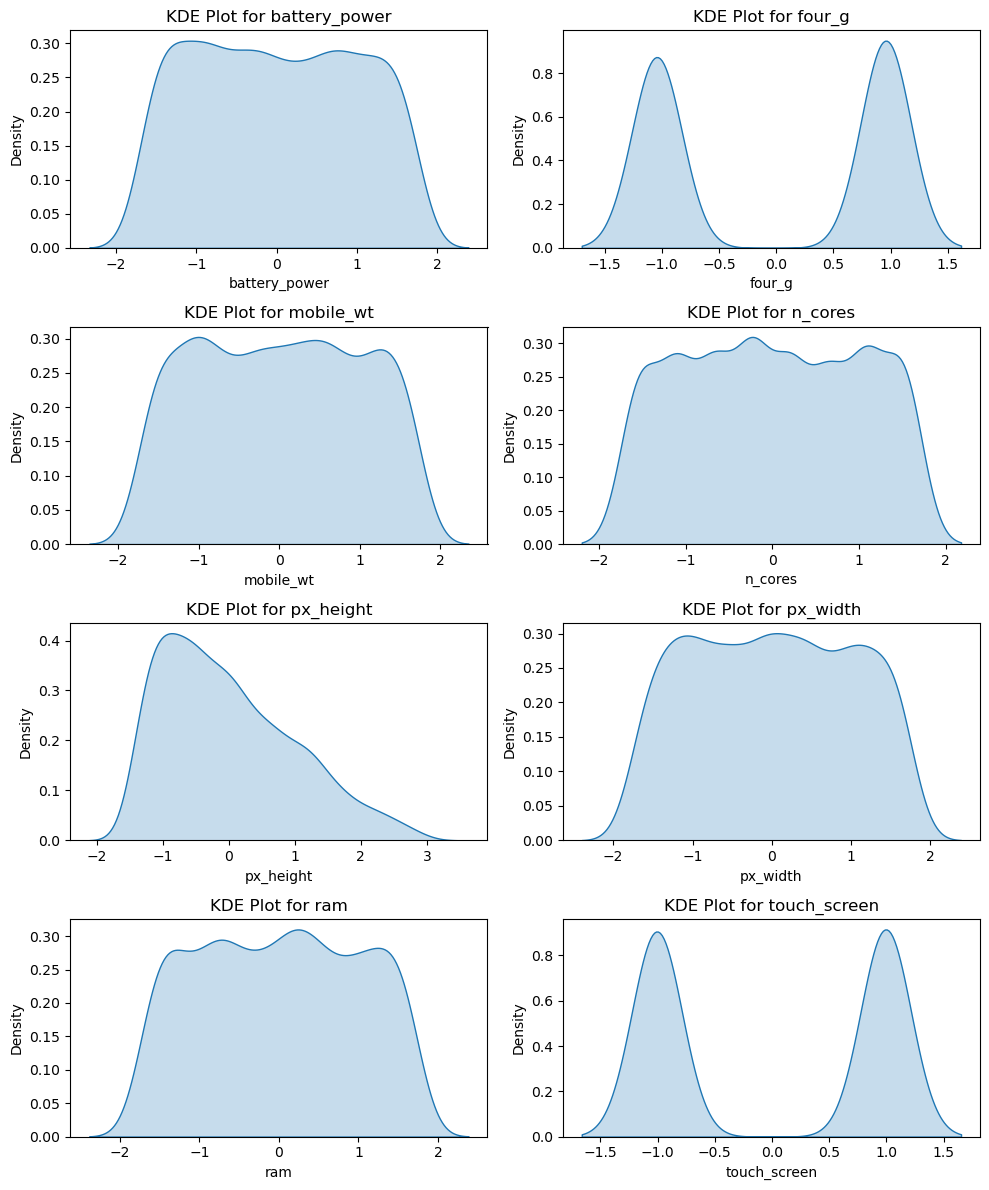

In [78]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.flatten()

# Loop through each feature and plot KDE
for i, feature in enumerate(x_train_df.columns):
    sns.kdeplot(data=x_train_df[feature], ax=axes[i], shade=True)
    axes[i].set_title(f'KDE Plot for {feature}', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


## "*Train the saved model with only best features selected (LDA):*"

In [56]:
cl2 = LinearDiscriminantAnalysis()

# evaluate the model using cross validation
cv_results = cross_val_score(cl2, x_train_df, y_train, cv=kfold, scoring='accuracy')
# Output the mean accuracy and standard deviation
print(f"Linear Discriminant Analysis => Mean Accuracy: {np.mean(cv_results):.4f}, Std Dev: {np.std(cv_results):.4f}")

# Perform cross-validation and get cross-validation predictions
crossval_preds = cross_val_predict(cl2, x_train_df, y_train, cv=kfold)

# Calculate cross-validation metrics
crossval_accuracy = accuracy_score(y_train, crossval_preds)
crossval_recall = recall_score(y_train, crossval_preds, average='macro')
crossval_precision = precision_score(y_train, crossval_preds, average='macro')
crossval_f1 = f1_score(y_train, crossval_preds, average='macro')

print("Cross-Validation Performance:")
print(f"Accuracy: {crossval_accuracy:.2f}")
print(f"Recall: {crossval_recall:.2f}")
print(f"Precision: {crossval_precision:.2f}")
print(f"F1-score: {crossval_f1:.2f}")

# fit the model
cl2.fit(x_train_df, y_train)
y_train_pred = cl2.predict(x_train_df)
#y_test_pred = cl2.predict(x_test)

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}%")
print(f"Recall: {recall_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"Precision: {precision_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"F1-score: {f1_score(y_train, y_train_pred, average='macro'):.2f}%")

Linear Discriminant Analysis => Mean Accuracy: 0.9487, Std Dev: 0.0118
Cross-Validation Performance:
Accuracy: 0.95
Recall: 0.95
Precision: 0.95
F1-score: 0.95
Training Set Performance:
Accuracy: 0.95%
Recall: 0.95%
Precision: 0.95%
F1-score: 0.95%


***

_**hyperparameter tuning**_

In [57]:
# Define the parameter grid for LDA
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solver options
    'shrinkage': [None, 'auto']  # Shrinkage options
}

# Create a GridSearchCV object
grid_search_lda = GridSearchCV(cl2, param_grid_lda, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search_lda.fit(x_train_df, y_train)

# Get the best parameters and the best score
best_params_lda = grid_search_lda.best_params_
best_score_lda = grid_search_lda.best_score_

print("Best parameters for LDA:", best_params_lda)
print("Best cross-validation accuracy score:", best_score_lda)

Best parameters for LDA: {'shrinkage': None, 'solver': 'svd'}
Best cross-validation accuracy score: 0.9481969039150412


***

## "*Logistic Regression with best selected features*"

In [58]:
cl1 = LogisticRegression()

# evaluate the model using cross validation
crossvalid_results = cross_val_score(cl1, x_train_df, y_train, cv=kfold, scoring='accuracy')
# output the mean accuracy and std deviation
print(f"Logistic Regression => Mean Accuracy: {np.mean(crossvalid_results):.4f}, Mean Std Deviation: {np.std(crossvalid_results):.4f}")


# Perform cross-validation and get cross-validation predictions
crossval_preds = cross_val_predict(cl1, x_train_df, y_train, cv=kfold)

# Calculate cross-validation metrics
crossval_accuracy = accuracy_score(y_train, crossval_preds)
crossval_recall = recall_score(y_train, crossval_preds, average='macro')
crossval_precision = precision_score(y_train, crossval_preds, average='macro')
crossval_f1 = f1_score(y_train, crossval_preds, average='macro')

print("Cross-Validation Performance:")
print(f"Accuracy: {crossval_accuracy:.2f}")
print(f"Recall: {crossval_recall:.2f}")
print(f"Precision: {crossval_precision:.2f}")
print(f"F1-score: {crossval_f1:.2f}")


cl1.fit(x_train_df, y_train)
y_train_pred = cl1.predict(x_train_df)
#y_test_pred = cl1.predict(x_test_2)

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}%")
print(f"Recall: {recall_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"Precision: {precision_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"F1-score: {f1_score(y_train, y_train_pred, average='macro'):.2f}%")

Logistic Regression => Mean Accuracy: 0.9663, Mean Std Deviation: 0.0104
Cross-Validation Performance:
Accuracy: 0.97
Recall: 0.97
Precision: 0.97
F1-score: 0.97
Training Set Performance:
Accuracy: 0.97%
Recall: 0.97%
Precision: 0.97%
F1-score: 0.97%


***

_**hyperparameter tuning**_

In [59]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization norm
}

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(cl1, param_grid_lr, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search_lr.fit(x_train_df, y_train)

# Get the best parameters and the best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best parameters for Logistic Regression:", best_params_lr)
print("Best cross-validation accuracy score:", best_score_lr)

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best cross-validation accuracy score: 0.9743516069010039


In [63]:
cl1 = LogisticRegression(C=10)

# evaluate the model using cross validation
crossvalid_results = cross_val_score(cl1, x_train_df, y_train, cv=kfold, scoring='accuracy')
# output the mean accuracy and std deviation
print(f"Logistic Regression => Mean Accuracy: {np.mean(crossvalid_results):.4f}, Mean Std Deviation: {np.std(crossvalid_results):.4f}")


# Perform cross-validation and get cross-validation predictions
crossval_preds = cross_val_predict(cl1, x_train_df, y_train, cv=kfold)

# Calculate cross-validation metrics
crossval_accuracy = accuracy_score(y_train, crossval_preds)
crossval_recall = recall_score(y_train, crossval_preds, average='macro')
crossval_precision = precision_score(y_train, crossval_preds, average='macro')
crossval_f1 = f1_score(y_train, crossval_preds, average='macro')

print("Cross-Validation Performance:")
print(f"Accuracy: {crossval_accuracy:.2f}")
print(f"Recall: {crossval_recall:.2f}")
print(f"Precision: {crossval_precision:.2f}")
print(f"F1-score: {crossval_f1:.2f}")


cl1.fit(x_train_df, y_train)
y_train_pred = cl1.predict(x_train_df)
#y_test_pred = cl1.predict(x_test_2)

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}%")
print(f"Recall: {recall_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"Precision: {precision_score(y_train, y_train_pred, average='macro'):.2f}%")
print(f"F1-score: {f1_score(y_train, y_train_pred, average='macro'):.2f}%")

Logistic Regression => Mean Accuracy: 0.9733, Mean Std Deviation: 0.0080
Cross-Validation Performance:
Accuracy: 0.97
Recall: 0.97
Precision: 0.97
F1-score: 0.97
Training Set Performance:
Accuracy: 0.98%
Recall: 0.98%
Precision: 0.98%
F1-score: 0.98%


***

## *Saving the best model whose trained with the best selected features and best paramters! :)*

In [61]:
cl1

LogisticRegression(C=100)

In [62]:
joblib.dump(cl1, "files\\best_logreg_mob_price_classifier.pkl")

['files\\best_logreg_mob_price_classifier.pkl']